---
title: Palmer Penguins kNN and Decision Trees
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [42]:
import palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [27]:
penguins = load_penguins()

In [28]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [29]:
categorical_cols = ['species', 'island', 'sex']
numerical_cols = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g','year']

In [30]:
X = penguins[categorical_cols + numerical_cols]
y = penguins['bill_depth_mm']

In [31]:
encoder = OneHotEncoder(drop='first')

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_cols)  
    ],
    remainder='passthrough'  
)

X_encoded = preprocessor.fit_transform(X)

In [33]:
encoded_feature_names = preprocessor.get_feature_names_out()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names, index=X.index)
X_encoded_df

,cat__species_Chinstrap,cat__species_Gentoo,cat__island_Dream,cat__island_Torgersen,cat__sex_male,cat__sex_nan,remainder__bill_length_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__year
0,0.0,0.0,0.0,1.0,1.0,0.0,39.1,181.0,3750.0,2007.0
1,0.0,0.0,0.0,1.0,0.0,0.0,39.5,186.0,3800.0,2007.0
2,0.0,0.0,0.0,1.0,0.0,0.0,40.3,195.0,3250.0,2007.0
3,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,2007.0
4,0.0,0.0,0.0,1.0,0.0,0.0,36.7,193.0,3450.0,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,1.0,0.0,1.0,0.0,1.0,0.0,55.8,207.0,4000.0,2009.0
340,1.0,0.0,1.0,0.0,0.0,0.0,43.5,202.0,3400.0,2009.0
341,1.0,0.0,1.0,0.0,1.0,0.0,49.6,193.0,3775.0,2009.0
342,1.0,0.0,1.0,0.0,1.0,0.0,50.8,210.0,4100.0,2009.0


In [34]:
X_encoded_df.isnull().sum()

cat__species_Chinstrap          0
cat__species_Gentoo             0
cat__island_Dream               0
cat__island_Torgersen           0
cat__sex_male                   0
cat__sex_nan                    0
remainder__bill_length_mm       2
remainder__flipper_length_mm    2
remainder__body_mass_g          2
remainder__year                 0
dtype: int64

In [38]:
X_encoded = X_encoded_df.dropna()
y = y[X_encoded.index]

# MLR

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_encoded, y)

LinearRegression()

In [56]:
y_pred_lin = lin_reg.predict(X_encoded)
mse_lin = mean_squared_error(y_clean, y_pred_lin)
print("The mean square error using multiple linear regression is:",mse_lin)

The mean square error using multiple linear regression is: 0.6041504180636775


# KNN when k=5

In [45]:
knn5 = KNeighborsRegressor(n_neighbors=5)
knn5.fit(X_encoded_clean, y_clean)

KNeighborsRegressor()

In [54]:
y_pred_knn5 = knn5.predict(X_encoded_clean)
mse_knn5 = mean_squared_error(y_clean, y_pred_knn5)
print("The mean square error when k=5 is:",mse_knn5)

The mean square error when k=5 is: 1.579385964912281


# KNN when k=10

In [47]:
knn10 = KNeighborsRegressor(n_neighbors=10)
knn10.fit(X_encoded_clean, y_clean)

KNeighborsRegressor(n_neighbors=10)

In [55]:
y_pred_knn10 = knn10.predict(X_encoded_clean)
mse_knn10 = mean_squared_error(y_clean, y_pred_knn10)
print("The mean square error when k=10 is:",mse_knn10)

The mean square error when k=10 is: 1.791468713450293


# Decision Tree

In [49]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_encoded_clean, y_clean)

DecisionTreeRegressor(random_state=42)

In [58]:
y_pred_tree = tree.predict(X_encoded_clean)
mse_tree = mean_squared_error(y_clean, y_pred_tree)
print("The mean square error using  D-tree is:",mse_tree)

The mean square error using  D-tree is: 0.0005263157894736867


In [52]:
errors = {
    'Linear Regression': mse_lin,
    'kNN (K=5)': mse_knn3,
    'kNN (K=10)': mse_knn10,
    'Decision Tree': mse_tree
}

In [59]:
best_model = min(errors, key=errors.get)
print(f"The best model is: {best_model} with MSE = {errors[best_model]:.5f}")

The best model is: Decision Tree with MSE = 0.00053


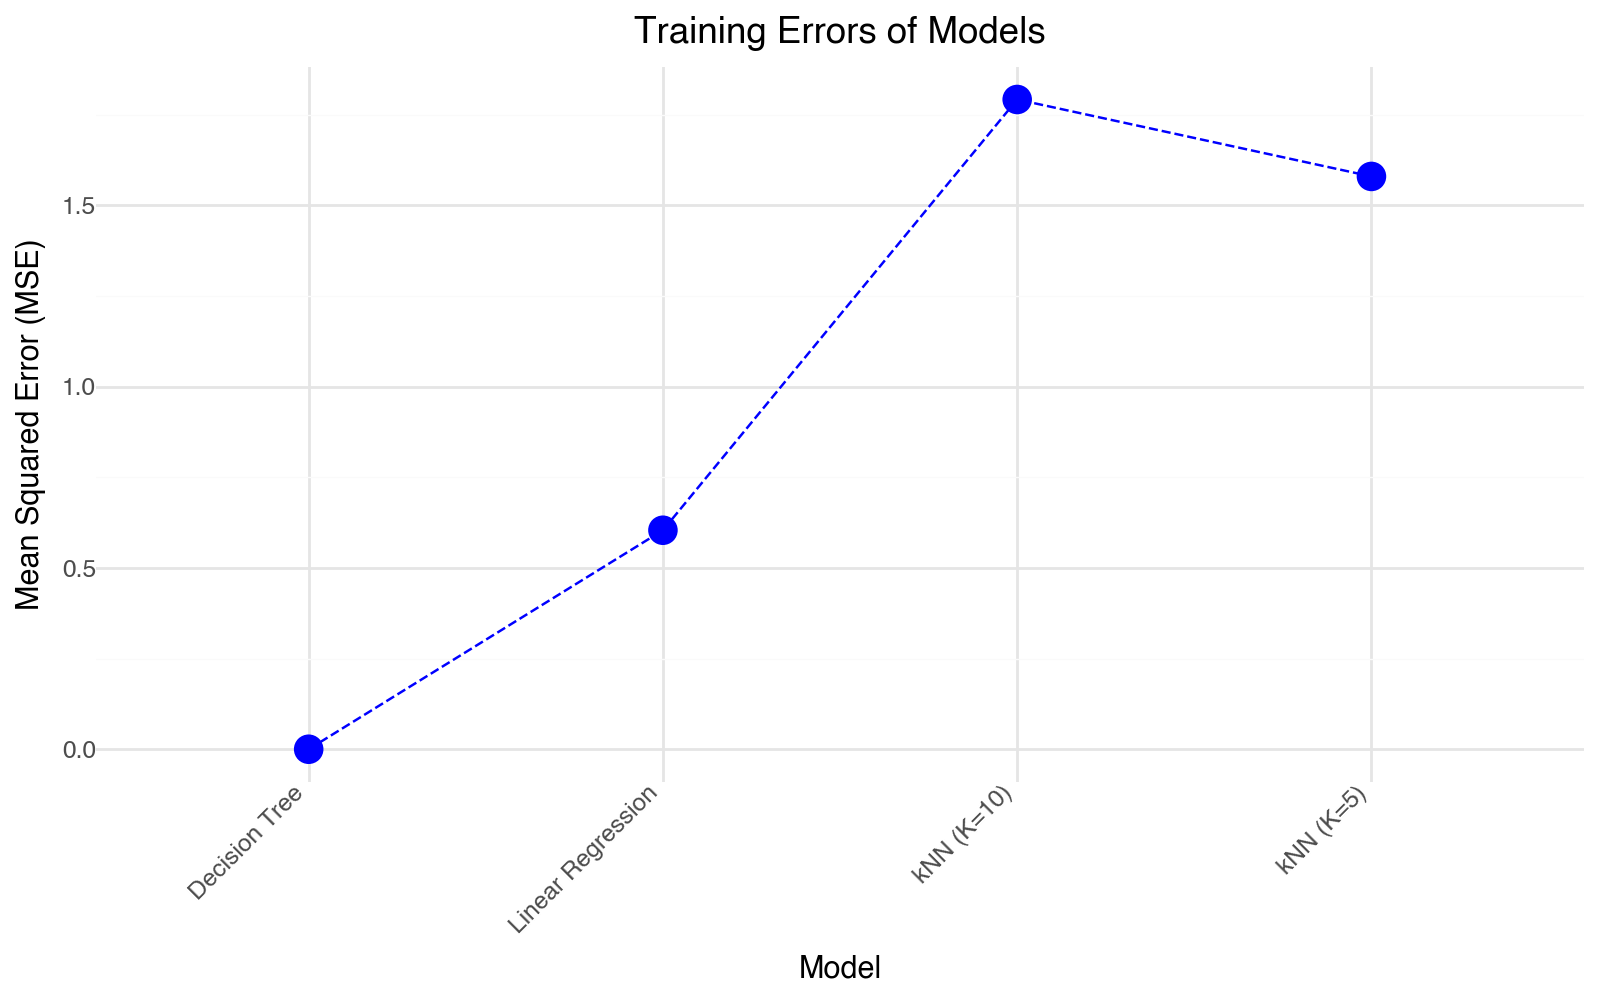

In [60]:
from plotnine import ggplot, aes, geom_point, theme_minimal, labs, element_text, theme, geom_line
import pandas as pd

errors_df = pd.DataFrame({
    'Model': list(errors.keys()),
    'MSE': list(errors.values())
})

plot = (
    ggplot(errors_df, aes(x='Model', y='MSE')) +
    geom_point(size=5, color='blue') +
    geom_line(group=1, color='blue', linetype='dashed') +
    theme_minimal() +
    labs(
        title='Training Errors of Models',
        x='Model',
        y='Mean Squared Error (MSE)'
    ) +
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(8, 5)
    )
)

plot.show()

**ON THE ENTIRE DATASET**

The **Decision Tree** model has the lowest MSE of **0.00053**, suggesting it performed well on the entire dataset. However, since it was trained on the full data, there might be **overfitting**, where the model memorizes the data instead of generalizing. We'll check the model's performance on a **test set** to see if the MSE increases.

# SPLITTING THE DATA

In [65]:
from sklearn.model_selection import train_test_split

In [68]:
def calculate_mse(X, y, model_type, k=None, random_state=42):
    
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=random_state)

    if model_type == 'linear':
        model = LinearRegression()
    elif model_type == 'knn':
        if k is None:
            raise ValueError("Please specify the value of k for KNN.")
        model = KNeighborsRegressor(n_neighbors=k)
    elif model_type == 'tree':
        model = DecisionTreeRegressor(random_state=random_state)
    else:
        raise ValueError("Invalid model_type. Choose from 'linear', 'knn', or 'tree'.")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return train_mse, test_mse

In [69]:
train_mse_lin, test_mse_lin = calculate_mse(X_encoded, y, 'linear')
print(f"Linear Regression - Train MSE: {train_mse_lin}, Test MSE: {test_mse_lin}")

train_mse_knn5, test_mse_knn5 = calculate_mse(X_encoded, y, 'knn', k=5)
print(f"KNN (k=5) - Train MSE: {train_mse_knn5}, Test MSE: {test_mse_knn5}")

train_mse_knn10, test_mse_knn10 = calculate_mse(X_encoded, y, 'knn', k=10)
print(f"KNN (k=10) - Train MSE: {train_mse_knn10}, Test MSE: {test_mse_knn10}")

train_mse_tree, test_mse_tree = calculate_mse(X_encoded, y, 'tree')
print(f"Decision Tree - Train MSE: {train_mse_tree}, Test MSE: {test_mse_tree}")

Linear Regression - Train MSE: 0.6053023327806472, Test MSE: 0.616872449314386
KNN (k=5) - Train MSE: 1.6429234375000004, Test MSE: 2.5451441860465116
KNN (k=10) - Train MSE: 1.9824941406250014, Test MSE: 2.4993581395348845
Decision Tree - Train MSE: 0.0, Test MSE: 1.7194186046511621


In [73]:
model_names = ['Linear Regression', 'KNN (k=5)', 'KNN (k=10)', 'Decision Tree']
train_mse = [train_mse_lin, train_mse_knn5, train_mse_knn10, train_mse_tree]
test_mse = [test_mse_lin, test_mse_knn5, test_mse_knn10, test_mse_tree]

mse_df = pd.DataFrame({
    'Model': model_names,
    'Train MSE': train_mse,
    'Test MSE': test_mse
})

mse_df_melted = mse_df.melt(id_vars='Model', value_vars=['Train MSE', 'Test MSE'], 
                             var_name='Data Type', value_name='MSE')

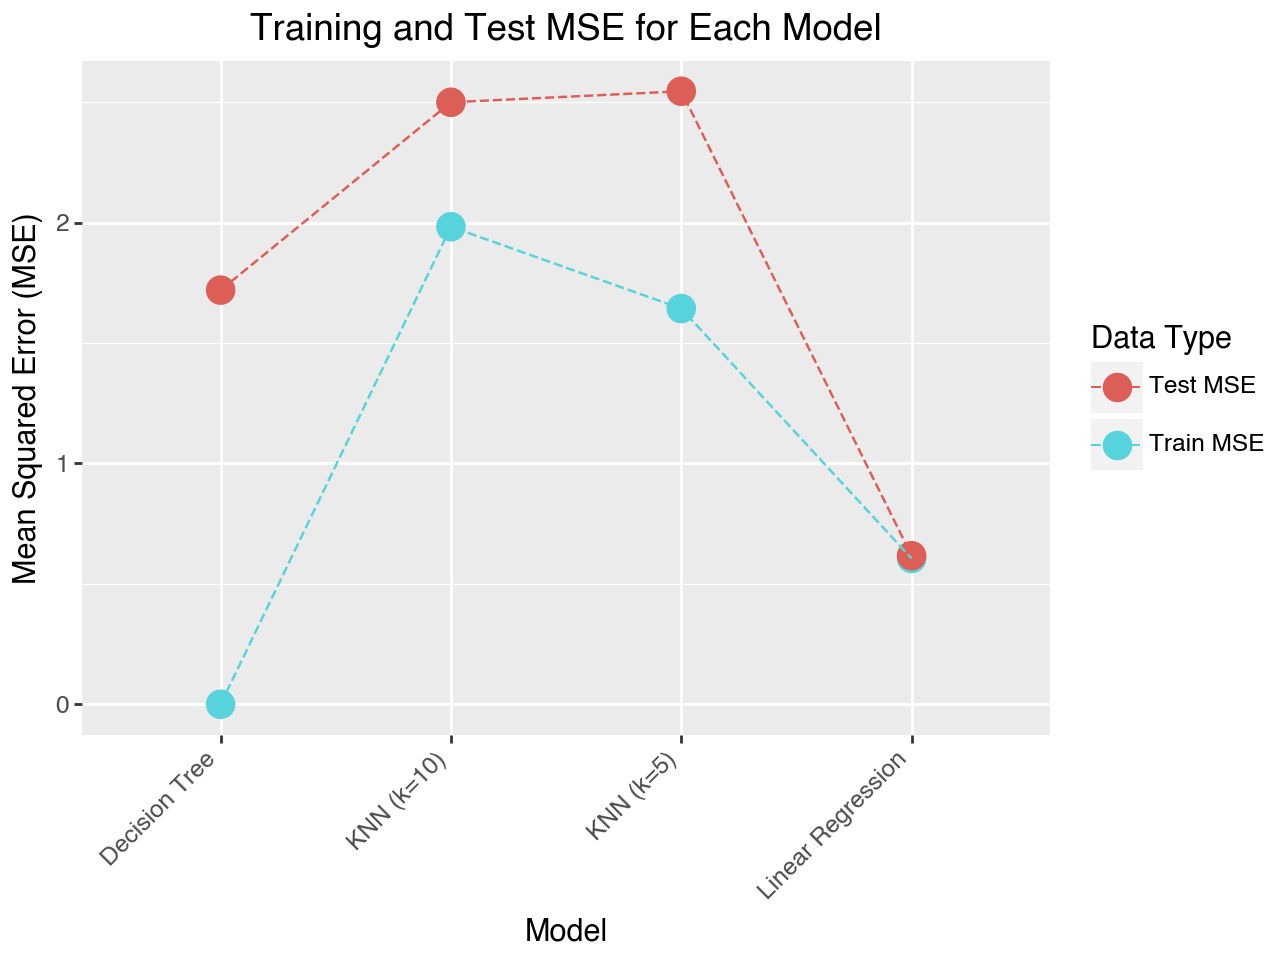

In [74]:
plot = (ggplot(mse_df_melted, aes(x='Model', y='MSE', color='Data Type', group='Data Type'))
        + geom_point(size=5)  
        + geom_line(linetype='dashed')
        + labs(title='Training and Test MSE for Each Model',
               x='Model',
               y='Mean Squared Error (MSE)')
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

plot.show()

# Which of your models was best?

**Linear Regression**  performs best, with a low test MSE of **0.6169** and a train MSE of **0.6053**, showing it fits the data well without overfitting. On the other hand, KNN (k=5) and KNN (k=10) have relatively high test MSEs (2.5451 and 2.4994, respectively) compared to their train MSEs, indicating overfitting. The Decision Tree model also exhibits overfitting, with a train MSE of 0.0 (perfect fit on training data) and a test MSE of 1.7194. Therefore, Linear Regression is the best model in this case, as it balances fitting and generalization effectively.